In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
import json

In [4]:
# Load and preprocess data
with open('C:\\Users\\nithy\\NK\\UCD\\Sem3\\SustainbleCityAI\\Backend\\plot_intensity\\co2_intensity_all_2025-07-01_2025-07-07.json', 'r') as file:
    json_data = json.load(file)

time_series = json_data['data']['time_series']
df = pd.DataFrame(time_series)

# Convert to datetime and localize to Ireland timezone
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
ireland = timezone('Europe/Dublin')
df['timestamp'] = df['timestamp'].dt.tz_localize(ireland)

# Resample to hourly mean (from 15-minute data)
data_hourly = df.set_index('timestamp')['value'].resample('h').mean().reset_index()

NameError: name 'start_date' is not defined

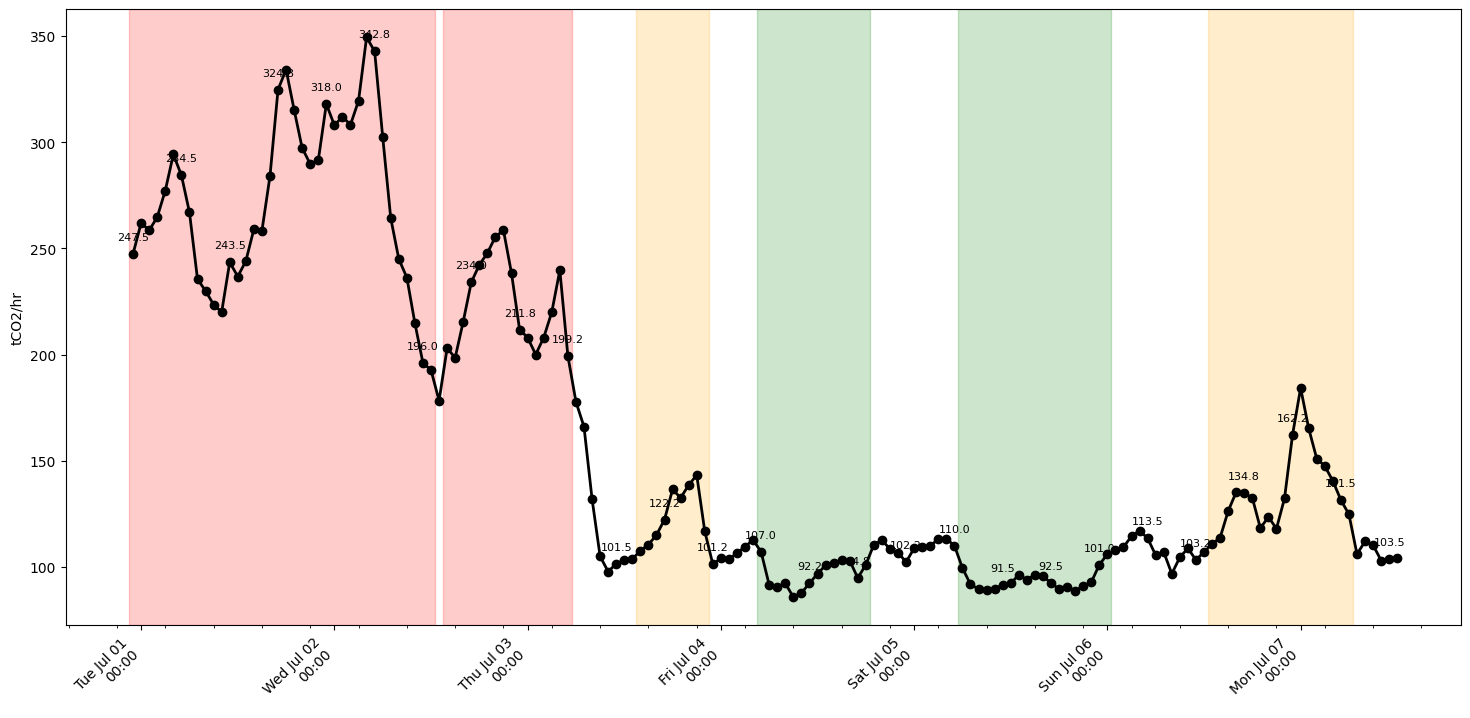

In [4]:
def analyze_weekly_intensity(df_):
    """Analyzes and visualizes weekly CO2 intensity with 15-min data aggregated to hourly."""
    
    df = df_.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.sort_values("timestamp", inplace=True)

    # Normalize the data
    min_val = df["value"].min()
    max_val = df["value"].max()
    df["normalized_value"] = (df["value"] - min_val) / (max_val - min_val)

    # Compute thresholds on normalized data
    p33 = np.percentile(df["normalized_value"], 33)
    p66 = np.percentile(df["normalized_value"], 66)

    # Categorize function
    def categorize(val):
        if val <= p33:
            return "Low"
        elif val <= p66:
            return "Medium"
        else:
            return "High"

    df["category"] = df["normalized_value"].apply(categorize)

    # Identify consecutive groups with same category
    df["group"] = (df["category"] != df["category"].shift()).cumsum()

    # Plotting
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.plot(df["timestamp"], df["value"], color="black", 
            linewidth=2, marker='o', markersize=6, label="CO2 Intensity (hourly avg)")

    # Color map for categories
    color_map = {"Low": "green", "Medium": "orange", "High": "red"}
    added_to_legend = set()

    # Loop over groups (checking for consecutive hours)
    for _, group_df in df.groupby("group"):
        category = group_df["category"].iloc[0]
        start_time = group_df["timestamp"].iloc[0]
        end_time = group_df["timestamp"].iloc[-1]
        duration_hours = (end_time - start_time).total_seconds() / 3600
        
        # Highlight regions lasting at least 6 consecutive hours (adjust as needed)
        if duration_hours >= 6:
            label = f"{category} Region" if category not in added_to_legend else None
            ax.axvspan(start_time - pd.Timedelta(minutes=30),  # Center the highlight
                      end_time + pd.Timedelta(minutes=30),
                      color=color_map[category], alpha=0.2, label=label)
            if label:
                added_to_legend.add(category)

    # Format x-axis for hourly data
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %b %d\n%H:%M"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Show minor ticks every 6 hours
    
    # Rotate and align x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    # Add value annotations for every 6 hours to avoid clutter
    for x, y in zip(df["timestamp"][::6], df["value"][::6]):
        ax.annotate(f"{y:.1f}", (x, y), textcoords="offset points", 
                   xytext=(0,10), ha='center', fontsize=8)

    ax.set_ylabel("tCO2/hr")
    ax.set_title(f"Hourly CO2 Intensity Trend ({start_date.strftime('%b %d')} to {end_date.strftime('%b %d')})")
    ax.legend(loc="upper right")
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Call the function with the weekly data
analyze_weekly_intensity(data_hourly)

NameError: name 'start_date' is not defined

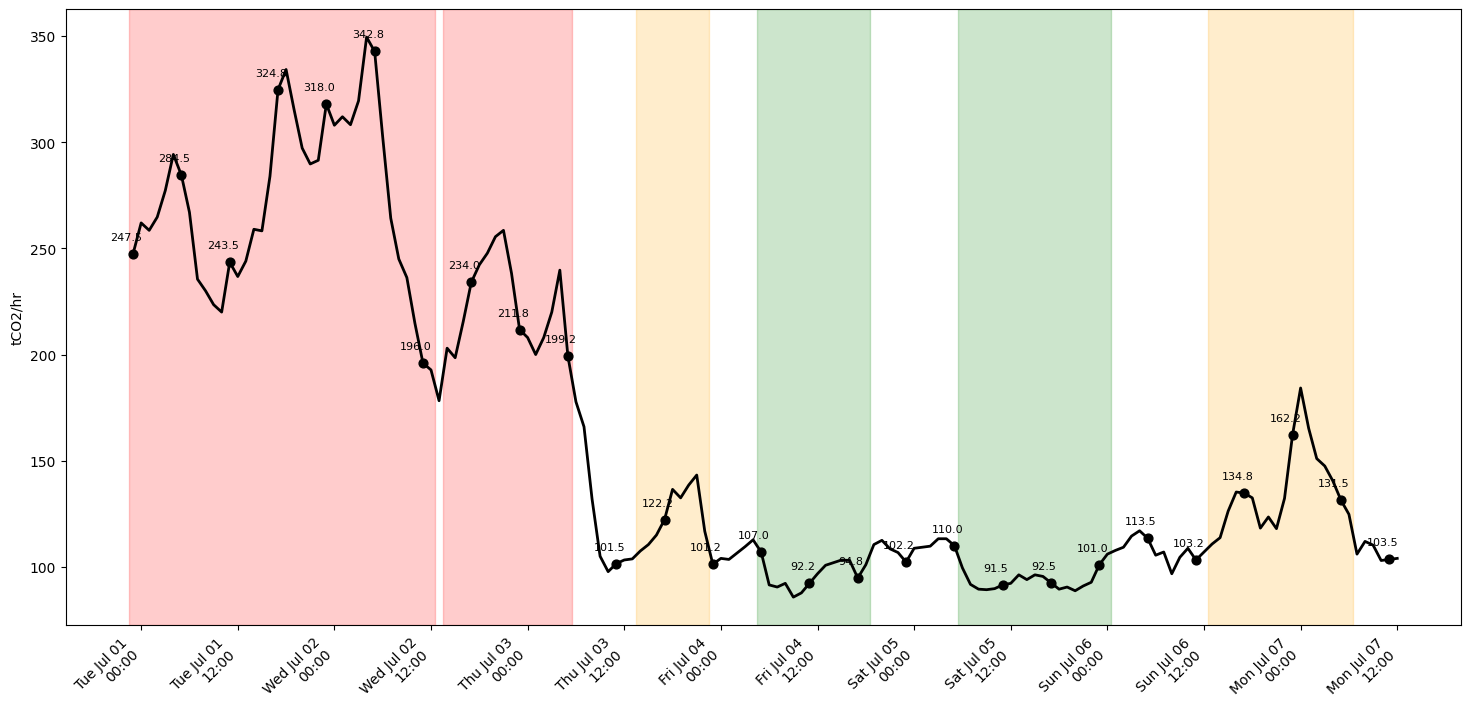

In [18]:
def analyze_weekly_intensity(df_):
    """Analyzes and visualizes weekly CO2 intensity with 15-min data aggregated to hourly."""
    
    df = df_.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.sort_values("timestamp", inplace=True)

    # Compute thresholds on data
    p33 = np.percentile(df["value"], 33)
    p66 = np.percentile(df["value"], 66)

    # Categorize function
    def categorize(val):
        if val <= p33:
            return "Low"
        elif val <= p66:
            return "Medium"
        else:
            return "High"

    df["category"] = df["value"].apply(categorize)

    # Identify consecutive groups with same category
    df["group"] = (df["category"] != df["category"].shift()).cumsum()

    # Plotting
    fig, ax = plt.subplots(figsize=(18, 8))
    
    ax.plot(df["timestamp"], df["value"], color="black", 
            linewidth=2, label="CO2 Intensity (hourly avg)")
    ax.scatter(df["timestamp"][::6], df["value"][::6], color="black", s=40, zorder=3)


    # Color map for categories
    color_map = {"Low": "green", "Medium": "orange", "High": "red"}
    added_to_legend = set()

    # Loop over groups (checking for consecutive hours)
    for _, group_df in df.groupby("group"):
        category = group_df["category"].iloc[0]
        start_time = group_df["timestamp"].iloc[0]
        end_time = group_df["timestamp"].iloc[-1]
        duration_hours = (end_time - start_time).total_seconds() / 3600
        
        # Highlight regions lasting at least 6 consecutive hours (adjust as needed)
        if duration_hours >= 6:
            label = f"{category} Region" if category not in added_to_legend else None
            ax.axvspan(start_time - pd.Timedelta(minutes=30),  # Center the highlight
                      end_time + pd.Timedelta(minutes=30),
                      color=color_map[category], alpha=0.2, label=label)
            if label:
                added_to_legend.add(category)

    # Format x-axis for hourly data
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 12]))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%a %b %d\n%H:%M"))
    # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Show minor ticks every 6 hours

    
    # Rotate and align x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    # Add value annotations for every 6 hours to avoid clutter
    for x, y in zip(df["timestamp"][::6], df["value"][::6]):
        ax.annotate(f"{y:.1f}", (x, y), textcoords="offset points", 
                   xytext=(-5,10), ha='center', fontsize=8)

    ax.set_ylabel("tCO2/hr")
    ax.set_title(f"Hourly CO2 Intensity Trend ({start_date.strftime('%b %d')} to {end_date.strftime('%b %d')})")
    ax.legend(loc="upper right")
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Call the function with the weekly data
analyze_weekly_intensity(data_hourly)